# **1. Perkenalan Dataset**

Dataset yang dipakai dalam submission ini berjudul Academic Performance of University Student Dataset. Dataset memiliki 3046 baris dan berisi catatan akademik mahasiswa, termasuk program studi, jenis kelamin, tahun kelulusan, serta metrik kinerja seperti IPK kumulatif (CGPA) dan IP semester (SGPA). Data telah dikategorikan ke dalam berbagai rentang untuk keperluan analisis statistik.

Keterangan :
1. ID No - Urutan angka yang dihasilkan secara acak
2. Prog Code - Program studi
3. Gender - Jenis kelamin
4. YoG - Tahun kelulusan
5. CGPA - Indeks Prestasi Kumulatif (IPK) secara keseluruhan
6. CGPA100 - IPK pada akhir tahun pertama
7. CGPA200 - IPK pada akhir tahun kedua
8. CGPA300 - IPK pada akhir tahun ketiga
9. CGPA400 - IPK pada akhir tahun keempat
10. SGPA - IPK saat di sekolah menengah

Program Studi
1. BCH - Biokimia
2. BLD - Teknologi Bangunan
3. CEN - Teknik Komputer
4. CHE - Teknik Kimia
5. CHM - Kimia Industri
6. CIS - Ilmu Komputer
7. CVE - Teknik Sipil
8. EEE - Teknik Elektro dan Elektronika
9. ICE - Teknik Informasi dan Komunikasi
10. MAT - Matematika
11. MCB - Mikrobiologi
12. MCE - Teknik Mesin
13. MIS - Manajemen dan Sistem Informasi
14. PET - Teknik Perminyakan
15. PHYE - Fisika Industri - Elektronika dan Aplikasi TI
16. PHYG - Fisika Industri - Geofisika Terapan
17. PHYR - Fisika Industri - Energi Terbarukan

# **2. Import Library**

Pada tahap ini, akan diimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [44]:
df = pd.read_csv('academic_performance_dataset_V2_inisiasi.csv')  
df.head()

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, akan dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Meninjau jumlah baris dan kolom dalam dataset.  
   - Meninjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Mengidentifikasi dan menganalisis data yang hilang (*missing values*).

3. **Analisis Distribusi dan Korelasi**  
   - Menganalisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Memeriksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Membuat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Menggunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris dan kolom dataset: (3046, 10)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID No      3046 non-null   int64  
 1   Prog Code  3046 non-null   object 
 2   Gender     3046 non-null   object 
 3   YoG        3046 non-null   int64  
 4   CGPA       3046 non-null   float64
 5   CGPA100    3046 non-null   float64
 6   CGPA200    3046 non-null   float64
 7   CGPA300    3046 non-null   float64
 8   CGPA400    3046 non-null   float64
 9   SGPA       3046 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 238.1+ KB

Statistik deskriptif untuk kolom numerik:
              ID No          YoG         CGPA      CGPA100      CGPA200  \
count   3046.000000  3046.000000  3046.000000  3046.000000  3046.000000   
mean   61082.817466  2012.183848     3.494813     3.636106     3.321687   
std    21256.53275

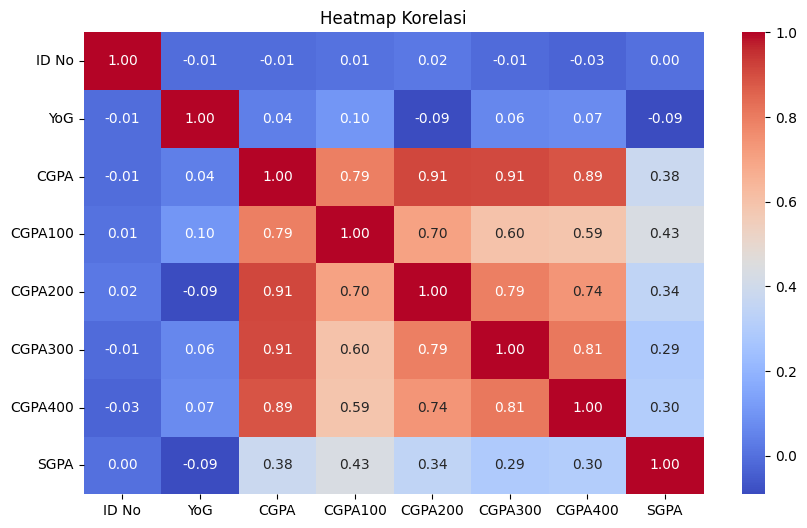

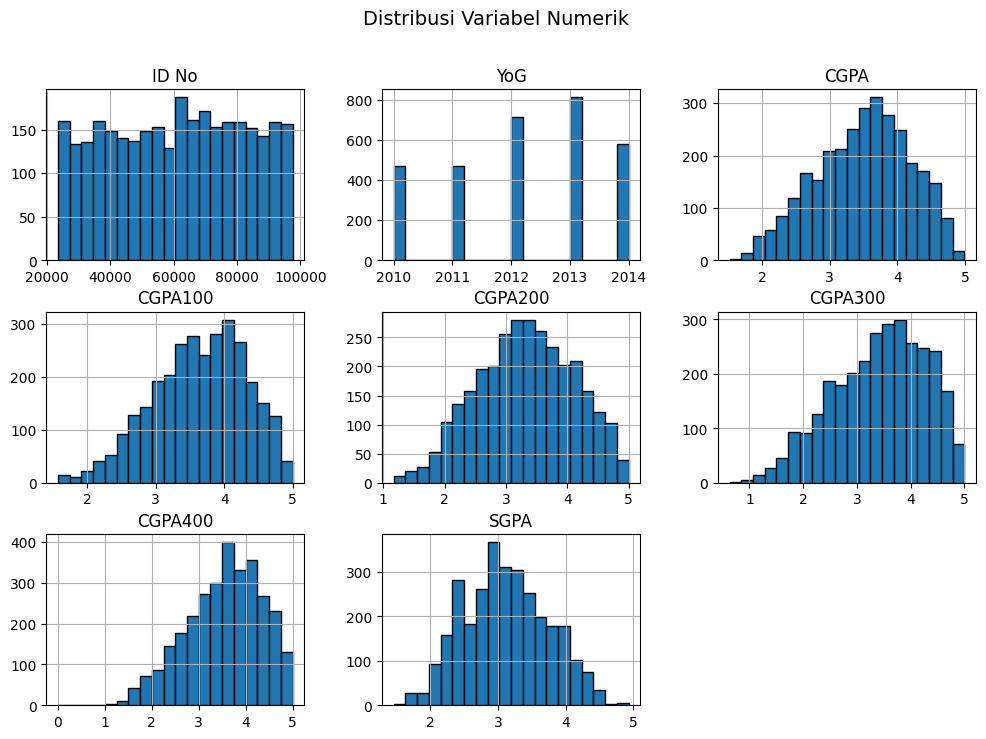

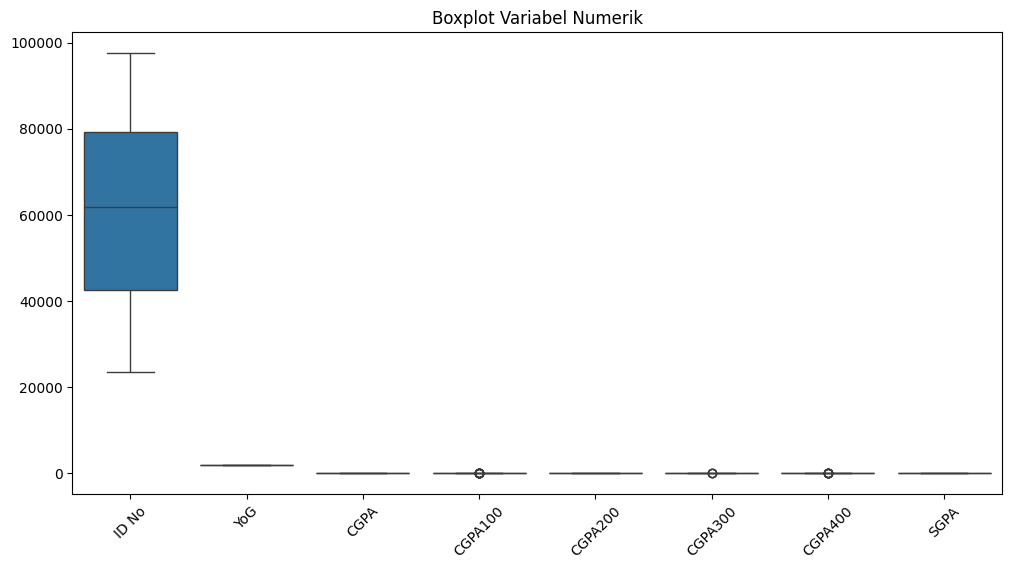

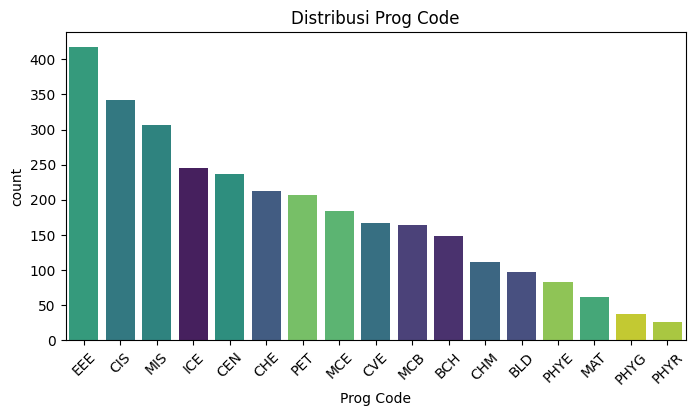

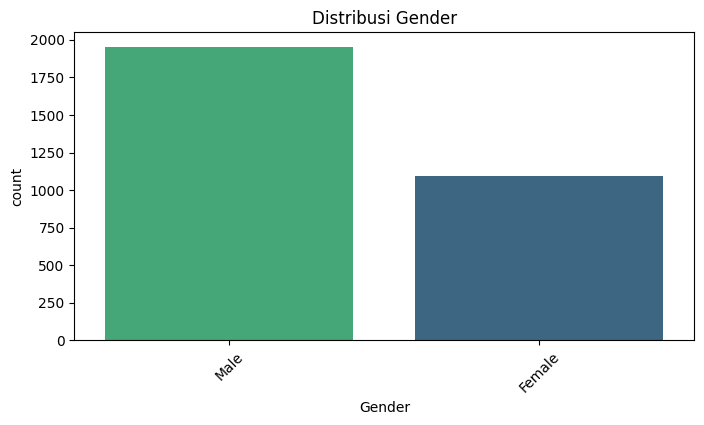

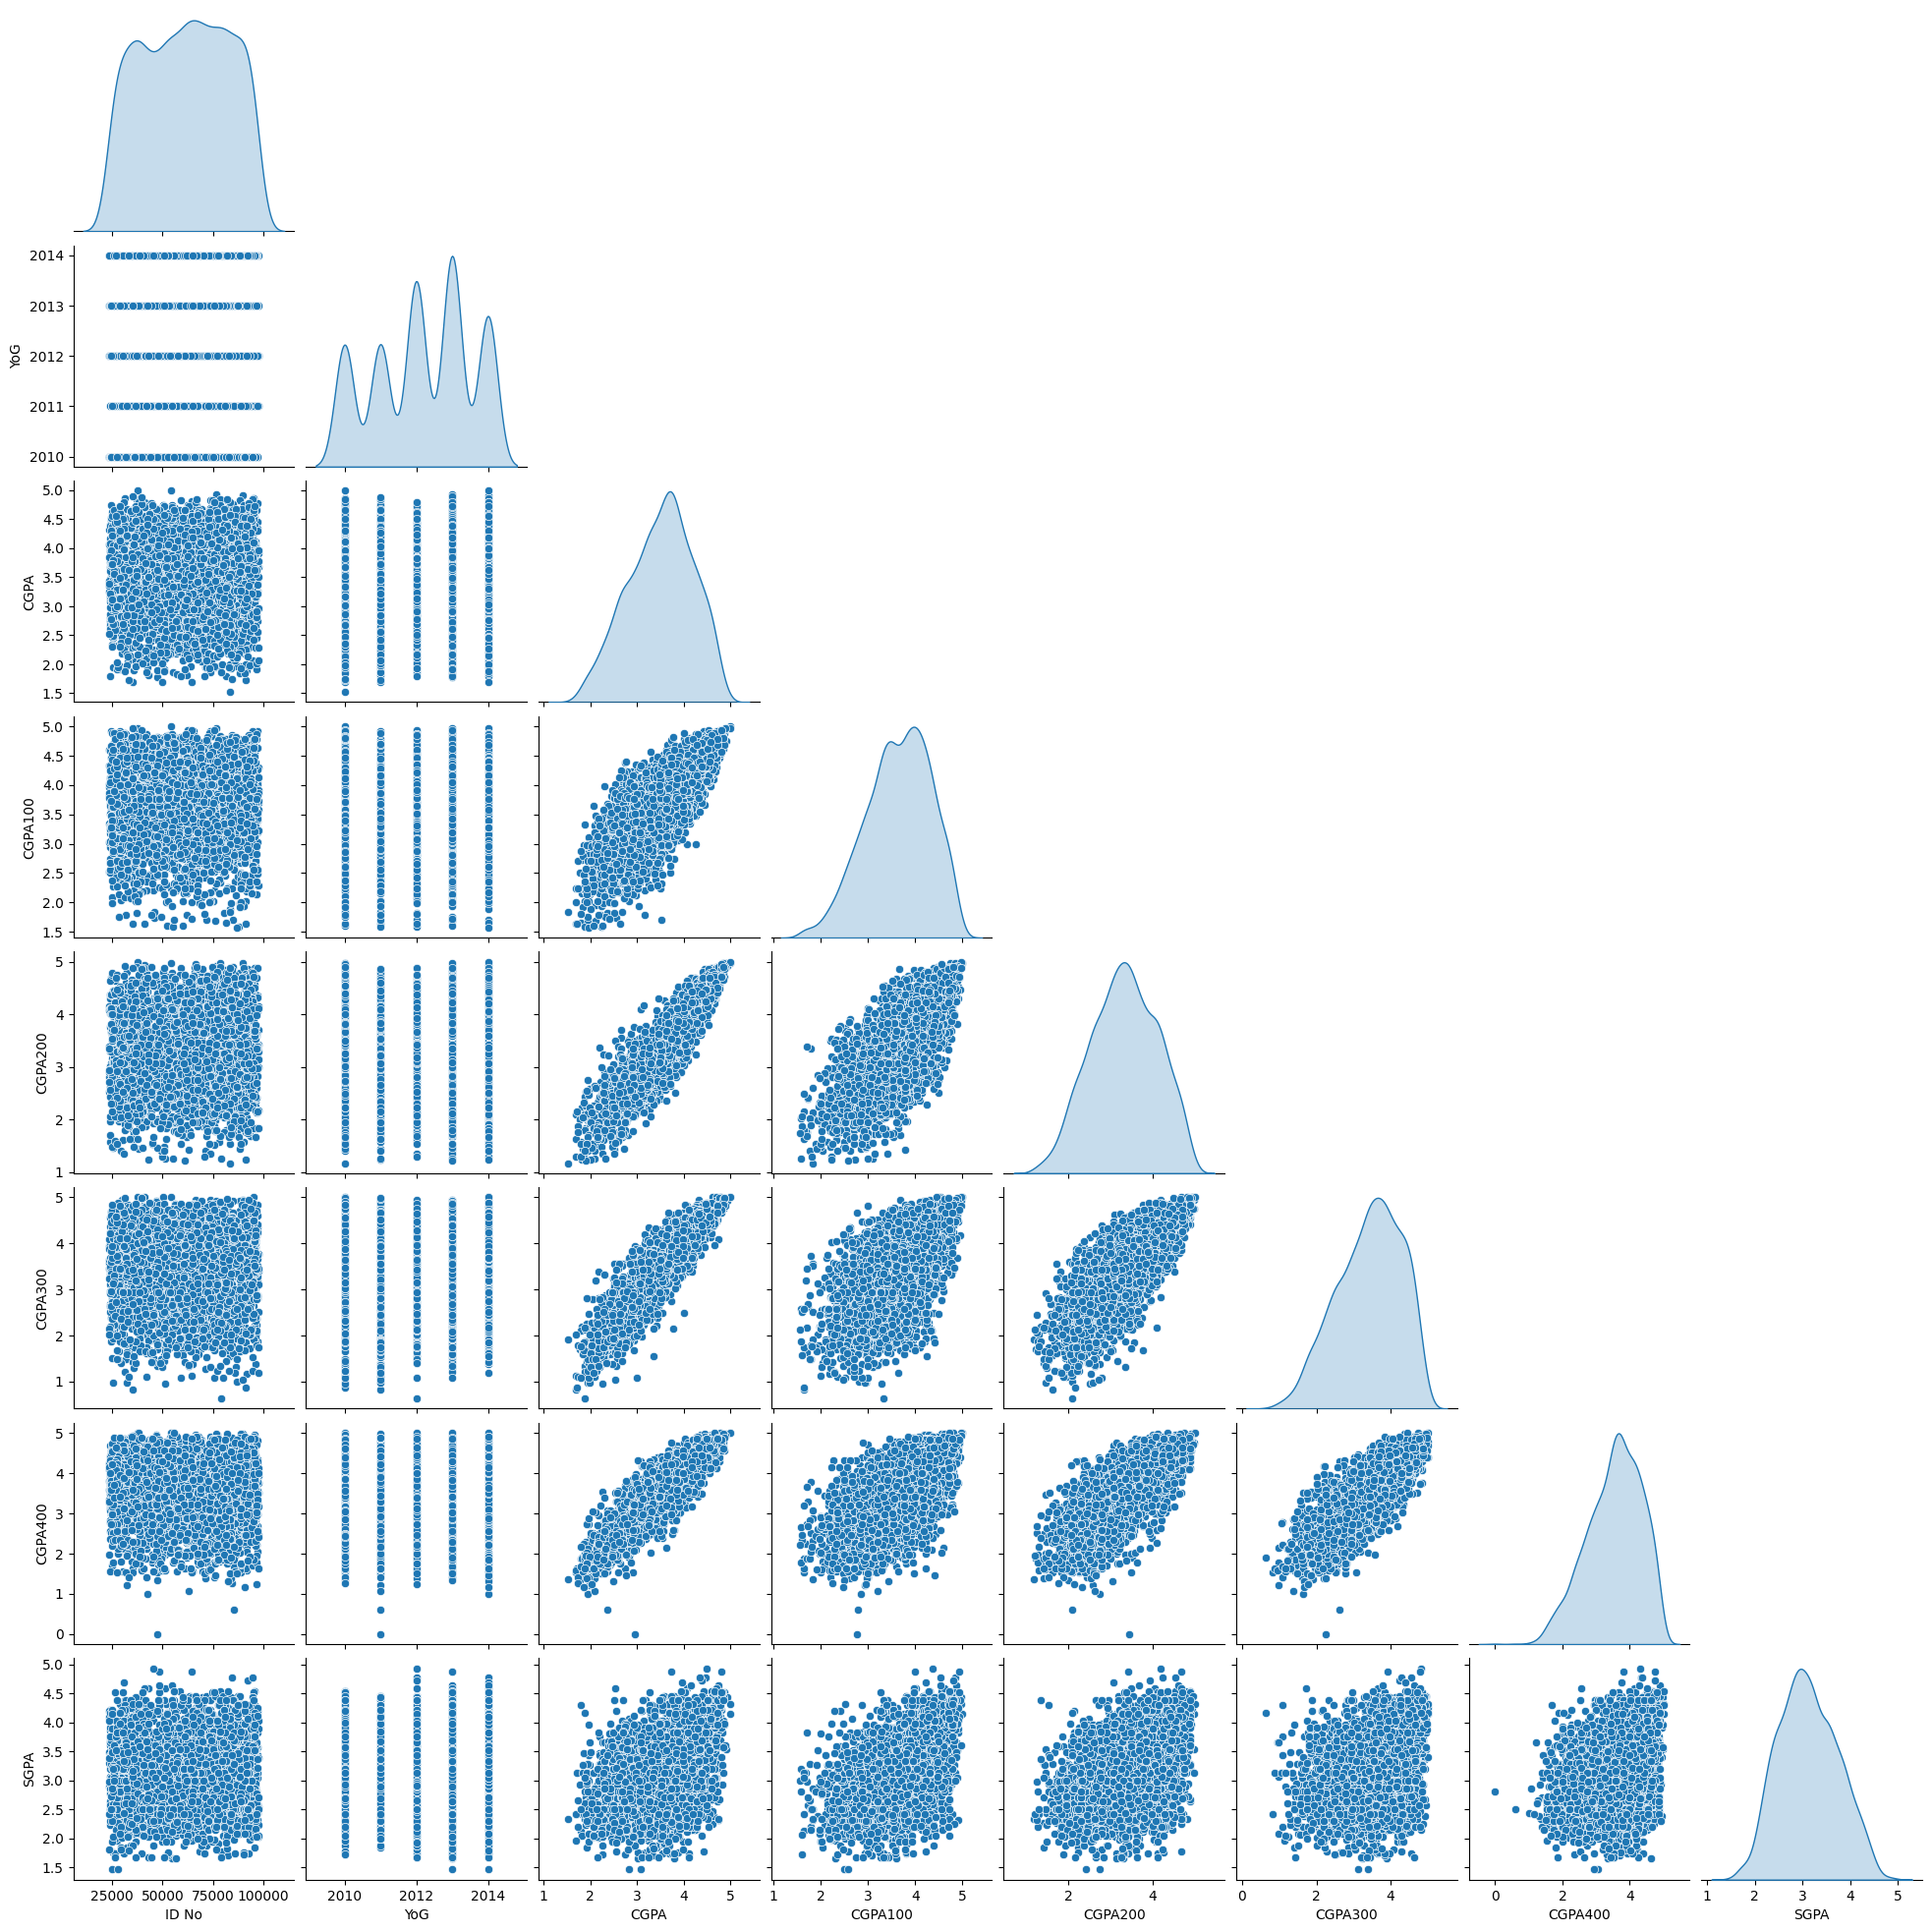

In [45]:
# Menampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom dataset:", df.shape)

# Menampilkan informasi dataset
print("\nInformasi dataset:")
df.info()

# Statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif untuk kolom numerik:")
print(df.describe())

# Statistik deskriptif untuk kolom kategorikal
print("\nStatistik deskriptif untuk kolom kategorikal:")
print(df.describe(include=['O']))

# Menangani data yang hilang
print("\nJumlah data yang hilang per kolom:")
print(df.isnull().sum())

# Mengisi nilai yang hilang untuk kolom numerik
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

# Mengisi nilai yang hilang untuk kolom kategorikal dengan modus
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0]) 

print("\nCek kembali data yang hilang setelah penanganan:")
print(df.isnull().sum())

# Heatmap Korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

# Histogram untuk distribusi variabel numerik
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle('Distribusi Variabel Numerik', fontsize=14)
plt.show()

# Boxplot untuk variabel numerik
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Boxplot Variabel Numerik")
plt.xticks(rotation=45)
plt.show()

# Visualisasi variabel kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette='viridis', order=df[col].value_counts().index, hue=df[col], legend=False)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.show()

# Pairplot untuk melihat hubungan antar variabel numerik
sns.pairplot(df, diag_kind="kde", corner=True)
plt.show()

# **5. Data Preprocessing**

Tahap data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang dilakukan :
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [46]:
# Menangani data yang hilang
print("\nJumlah data yang hilang per kolom:")
print(df.isnull().sum())

# Mengisi nilai yang hilang untuk kolom numerik
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

# Mengisi nilai yang hilang untuk kolom kategorikal dengan modus
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0]) 

print("\nCek kembali data yang hilang setelah penanganan:")
print(df.isnull().sum())

# Menghapus Data Duplikat
df.drop_duplicates(inplace=True)
print(f"\nJumlah data setelah menghapus duplikasi: {df.shape}")

# Normalisasi atau Standarisasi Fitur (Hanya untuk variabel numerik)
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Deteksi dan Penanganan Outlier (Menggunakan Z-Score)
z_scores = np.abs(stats.zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]  # Hapus data dengan z-score > 3

print(f"\nJumlah data setelah menghapus outlier: {df.shape}")

# Encoding Data Kategorikal (Label Encoding)
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

# Binning (Pengelompokan Data) Contoh: Membagi nilai CGPA menjadi kategori
if 'CGPA' in df.columns:
    df['CGPA_Binned'] = pd.cut(df['CGPA'], bins=[0, 2.5, 3.5, 4.0], labels=['Low', 'Medium', 'High'])
    df['CGPA_Binned'] = encoder.fit_transform(df['CGPA_Binned'])



Jumlah data yang hilang per kolom:
ID No        0
Prog Code    0
Gender       0
YoG          0
CGPA         0
CGPA100      0
CGPA200      0
CGPA300      0
CGPA400      0
SGPA         0
dtype: int64

Cek kembali data yang hilang setelah penanganan:
ID No        0
Prog Code    0
Gender       0
YoG          0
CGPA         0
CGPA100      0
CGPA200      0
CGPA300      0
CGPA400      0
SGPA         0
dtype: int64

Jumlah data setelah menghapus duplikasi: (3046, 10)

Jumlah data setelah menghapus outlier: (3037, 10)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [47]:
# Model Clustering dengan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numeric_cols])
print("\nClustering selesai. Data telah dikelompokkan ke dalam 3 cluster.")


Clustering selesai. Data telah dikelompokkan ke dalam 3 cluster.


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.


Silhouette Score untuk model clustering: 0.1969230552254535


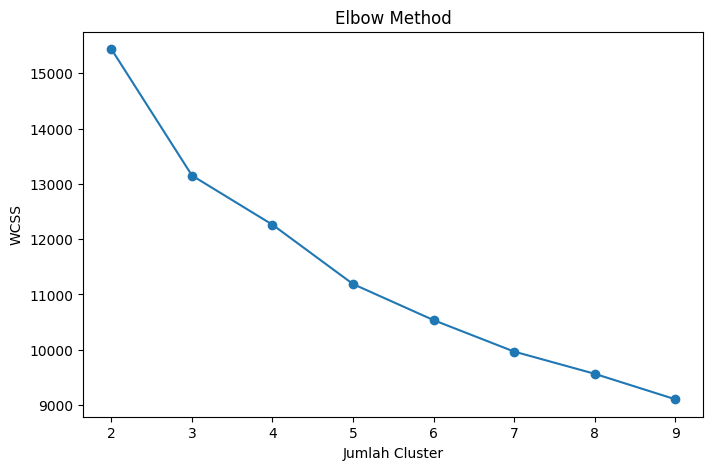

In [48]:
# Evaluasi Model Clustering
silhouette_avg = silhouette_score(df[numeric_cols], df['Cluster'])
print(f"\nSilhouette Score untuk model clustering: {silhouette_avg}")

# Menentukan jumlah cluster optimal dengan Elbow Method
wcss = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numeric_cols])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

## **c. Feature Selection (Opsional)**

Feature Selection ini menggunakan SelectKBest dan akan membandingkang silhouette Score setelah feature selection dan sebelum feature selection

In [49]:
#Feature Selection (Menggunakan SelectKBest)
X = df[numeric_cols]
y = df['Cluster']
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(f"\nFitur yang dipilih untuk clustering: {selected_features}")

# Pemodelan ulang dengan fitur yang dipilih
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster_Optimized'] = kmeans.fit_predict(X_selected)

# Evaluasi ulang
silhouette_avg_opt = silhouette_score(X_selected, df['Cluster_Optimized'])
print(f"\nSilhouette Score setelah feature selection: {silhouette_avg_opt}")



Fitur yang dipilih untuk clustering: Index(['CGPA', 'CGPA100', 'CGPA200', 'CGPA300', 'CGPA400'], dtype='object')

Silhouette Score setelah feature selection: 0.35302353049477114


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.Hasil clustering ditampilkan dalam bentuk visualisasi, seperti 2D PCA projection.

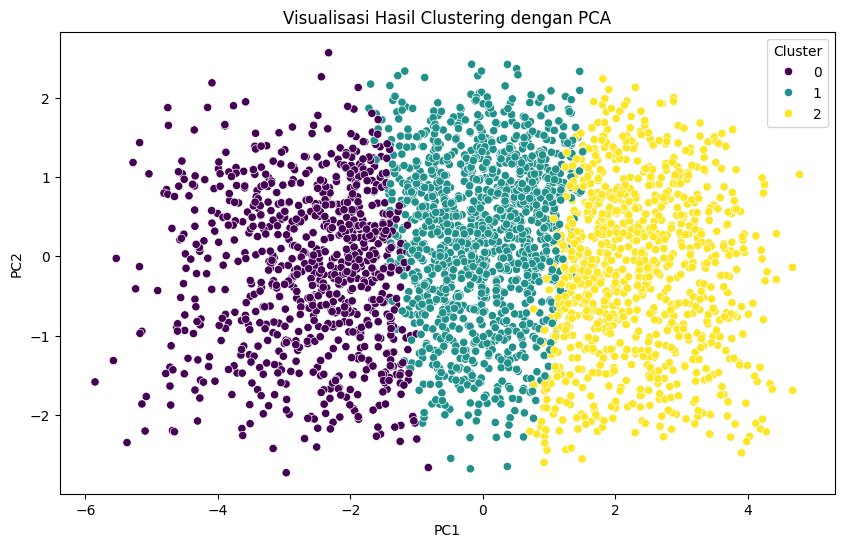

In [50]:
# Visualisasi Hasil Clustering
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[numeric_cols])
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=df)
plt.title("Visualisasi Hasil Clustering dengan PCA")
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [55]:
df['Cluster'] = kmeans.labels_

label_encoders = {}

for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
    
for col in label_encoders:
    df[col] = label_encoders[col].inverse_transform(df[col])

print("\nAnalisis hasil clustering telah selesai!")



Analisis hasil clustering telah selesai!


### Inverse Data Jika Melakukan Normalisasi/Standardisasi


Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [56]:
# Inverse transform untuk data numerik yang telah distandarisasi
df[numeric_cols] = scaler.inverse_transform(df[numeric_cols])

print("\nInverse transform untuk data numerik selesai!")



Inverse transform untuk data numerik selesai!


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [59]:
# Analisis karakteristik tiap cluster berdasarkan rata-rata fitur numerik
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()

print("\nAnalisis Karakteristik Cluster:")
print(cluster_summary)



Analisis Karakteristik Cluster:
                ID No          YoG      CGPA   CGPA100   CGPA200   CGPA300  \
Cluster                                                                      
0        61486.564103  2012.070818  2.609365  2.962137  2.430073  2.399597   
1        60614.216157  2012.169214  4.281736  4.263439  4.185699  4.304869   
2        61133.542243  2012.267281  3.507727  3.627473  3.282542  3.447435   

          CGPA400      SGPA  
Cluster                      
0        2.595922  2.852418  
1        4.321386  3.423079  
2        3.581283  3.075714  


# Analisis Karakteristik Cluster dari Model KMeans
Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.
## Cluster 0:
- Rata-rata Tahun Kelulusan: 2012.07
- Rata-rata IPK Keseluruhan (CGPA): 2.61
- Rata-rata IPK Tahun Pertama (CGPA100): 2.96
- Rata-rata IPK Tahun Kedua (CGPA200): 2.43
- Rata-rata IPK Tahun Ketiga (CGPA300): 2.40
- Rata-rata IPK Tahun Keempat (CGPA400): 2.60
- Rata-rata IPK Sekolah Menengah (SGPA): 2.85
- Analisis: Mahasiswa dalam cluster ini cenderung memiliki IPK yang lebih rendah dibanding cluster lainnya, dengan tren penurunan pada tahun kedua dan ketiga sebelum meningkat sedikit di tahun keempat. Ini mungkin mengindikasikan bahwa mereka mengalami kesulitan akademik di tengah masa studi namun berhasil sedikit meningkatkan performa menjelang kelulusan.

## Cluster 1:
- Rata-rata Tahun Kelulusan: 2012.17
- Rata-rata IPK Keseluruhan (CGPA): 4.28
- Rata-rata IPK Tahun Pertama (CGPA100): 4.26
- Rata-rata IPK Tahun Kedua (CGPA200): 4.19
- Rata-rata IPK Tahun Ketiga (CGPA300): 4.30
- Rata-rata IPK Tahun Keempat (CGPA400): 4.32
- Rata-rata IPK Sekolah Menengah (SGPA): 3.42
- Analisis: Cluster ini terdiri dari mahasiswa dengan performa akademik yang sangat tinggi dan stabil sepanjang tahun. Mereka menunjukkan konsistensi dalam mendapatkan nilai tinggi, yang bisa mencerminkan kelompok mahasiswa unggulan dengan tingkat kesiapan akademik yang baik sejak awal kuliah.

## Cluster 2:
- Rata-rata Tahun Kelulusan: 2012.27
- Rata-rata IPK Keseluruhan (CGPA): 3.51
- Rata-rata IPK Tahun Pertama (CGPA100): 3.63
- Rata-rata IPK Tahun Kedua (CGPA200): 3.28
- Rata-rata IPK Tahun Ketiga (CGPA300): 3.45
- Rata-rata IPK Tahun Keempat (CGPA400): 3.58
- Rata-rata IPK Sekolah Menengah (SGPA): 3.08
- Analisis: Cluster ini berisi mahasiswa dengan performa akademik menengah ke atas. Mereka mengalami sedikit penurunan pada tahun kedua tetapi berhasil bangkit kembali pada tahun berikutnya. Hal ini mungkin menunjukkan bahwa mahasiswa dalam cluster ini mampu beradaptasi dengan tantangan akademik setelah mengalami sedikit hambatan di pertengahan studi.

# **7. Mengeksport Data**

Menyimpan hasilnya ke dalam file CSV.

In [60]:
df.to_csv("hasil_clustering_mahasiswa.csv", index=False)
print("Data berhasil disimpan ke hasil_clustering_mahasiswa.csv")


Data berhasil disimpan ke hasil_clustering_mahasiswa.csv
